# Exploratory Data Analysis (EDA) of ETT Dataset

In [14]:

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import font_manager as fm

# Load the dataset
file_path = "C:\\Users\\wbscr\\OneDrive\\Code\\Oil Temperature Analysis\\restructured\\predict-oil-temp\\data\\ett.csv"
font_path = "C:\\Users\\wbscr\\OneDrive\\Code\\Oil Temperature Analysis\\restructured\\predict-oil-temp\\fonts\\NotoSansCJKjp-Regular.ttf"

# 日本語フォントを指定
jp_font = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = jp_font.get_name()

df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    17420 non-null  object 
 1   HUFL    17420 non-null  float64
 2   HULL    17420 non-null  float64
 3   MUFL    17420 non-null  float64
 4   MULL    17420 non-null  float64
 5   LUFL    17420 non-null  float64
 6   LULL    17420 non-null  float64
 7   OT      17420 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,01/07/2016 00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,01/07/2016 01:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,01/07/2016 02:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,01/07/2016 03:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,01/07/2016 04:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [15]:

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y %H:%M")

# Set 'date' as the index for time series analysis
df.set_index('date', inplace=True)

# Basic statistical summary
df.describe()


,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000
mean,7.375141,2.242242,4.300239,0.881568,3.066062,0.856932,13.324672
std,7.067744,2.042342,6.826978,1.809293,1.164506,0.599552,8.566946
min,-22.705999,-4.756000,-25.087999,-5.934000,-1.188000,-1.371000,-4.080000
25%,5.827000,0.737000,3.296000,-0.284000,2.315000,0.670000,6.964000
50%,8.774000,2.210000,5.970000,0.959000,2.833000,0.975000,11.396000
75%,11.788000,3.684000,8.635000,2.203000,3.625000,1.218000,18.079000
max,23.643999,10.114000,17.341000,7.747000,8.498000,3.046000,46.007000


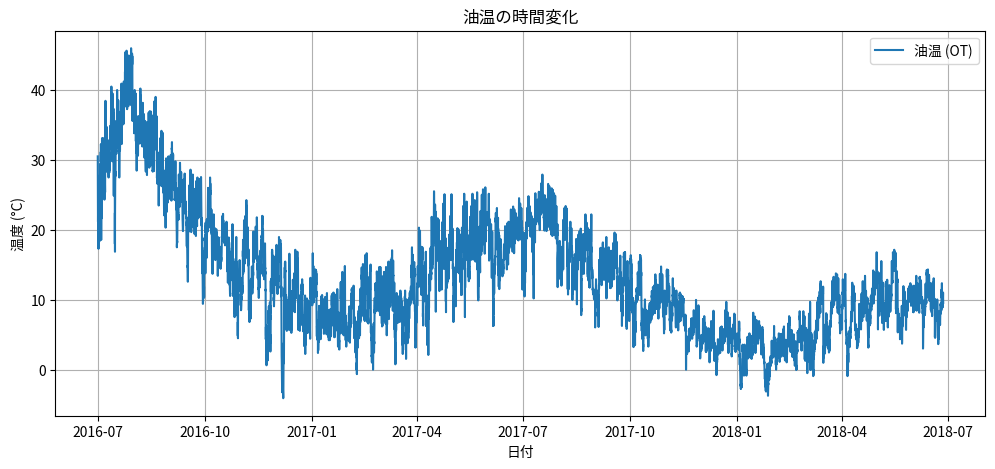

In [16]:

# Plot the OT (Oil Temperature) trend over time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['OT'], label="油温 (OT)", color="tab:blue")
plt.xlabel("日付")
plt.ylabel("温度 (°C)")
plt.title("油温の時間変化")
plt.legend()
plt.grid()
plt.show()


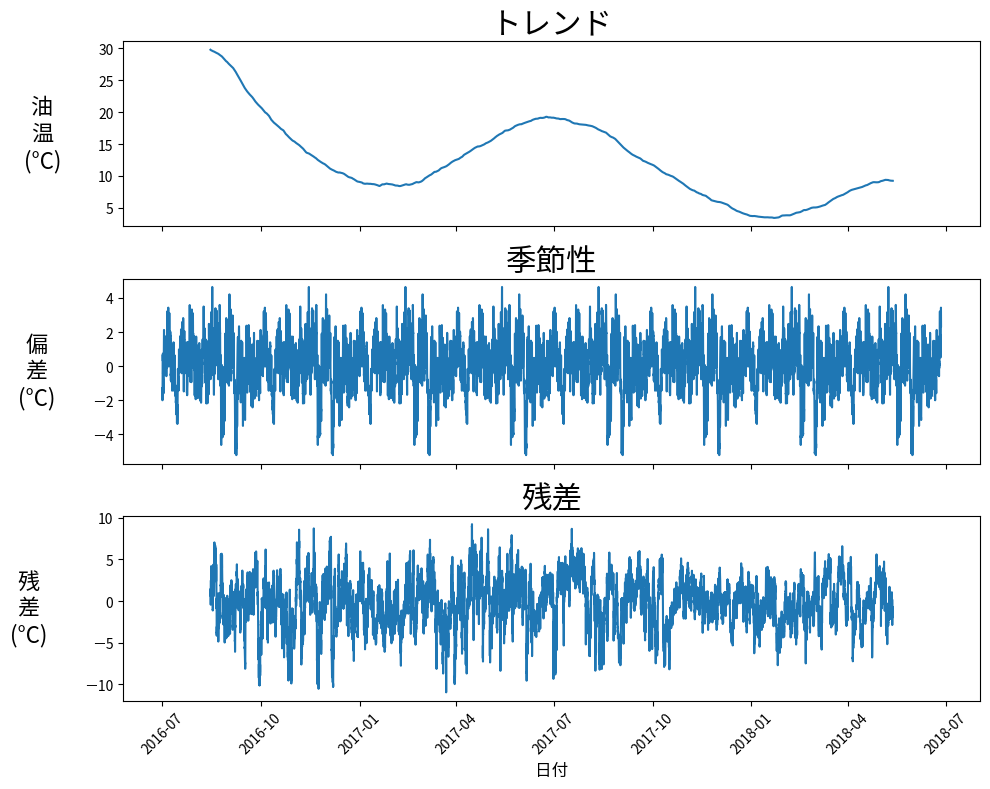

In [39]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition (using additive model)
decomposition = seasonal_decompose(df['OT'], model='additive', period=720*3)  # Assuming hourly data

# Create the plot
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Define labels for each component (excluding observed)
components = ['トレンド', '季節性', '残差']
y_labels = ['油\n温\n(°C)', '偏\n差\n(°C)', '残\n差\n(°C)']
data = [decomposition.trend, decomposition.seasonal, decomposition.resid]

for ax, comp, series, ylabel in zip(axes, components, data, y_labels):
    ax.plot(series)
    ax.set_ylabel(ylabel, fontsize=16, rotation=0, labelpad=40, va='center')
    ax.set_title(comp, fontsize=22)

# Formatting x-axis for better readability
axes[-1].set_xlabel('日付', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# plt.suptitle('油温の季節分解', fontsize=28)
plt.tight_layout()
plt.show()



In [18]:

# Correlation matrix to see how other columns affect OT
correlation_matrix = df.corr()
print(correlation_matrix['OT'])


HUFL    0.059916
HULL    0.224354
MUFL    0.050854
MULL    0.220004
LUFL    0.118836
LULL    0.067455
OT      1.000000
Name: OT, dtype: float64


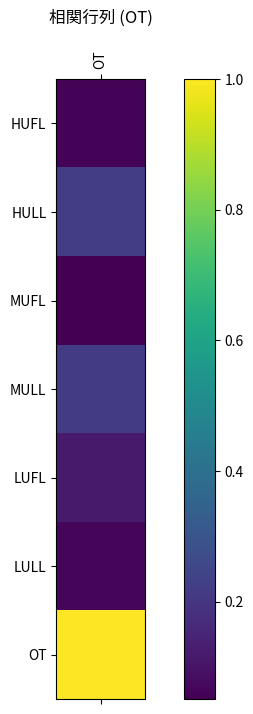

In [40]:
# Plot correlation matrix for OT
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix[['OT']], fignum=1)
plt.xticks(range(len(correlation_matrix[['OT']].columns)), correlation_matrix[['OT']].columns, rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.colorbar()
plt.title("相関行列 (OT)", pad=20)
plt.show()


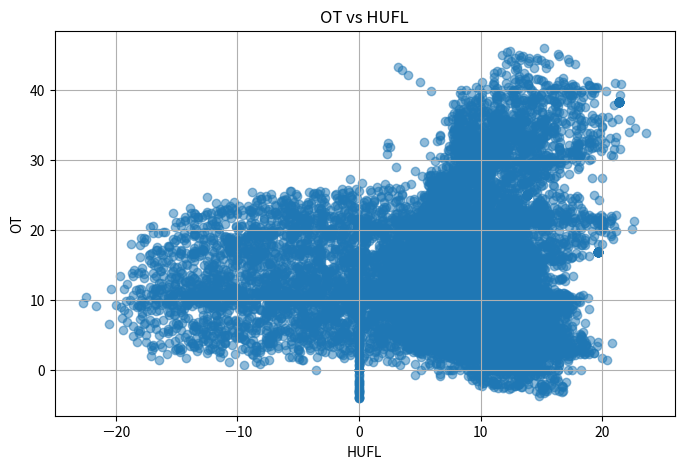

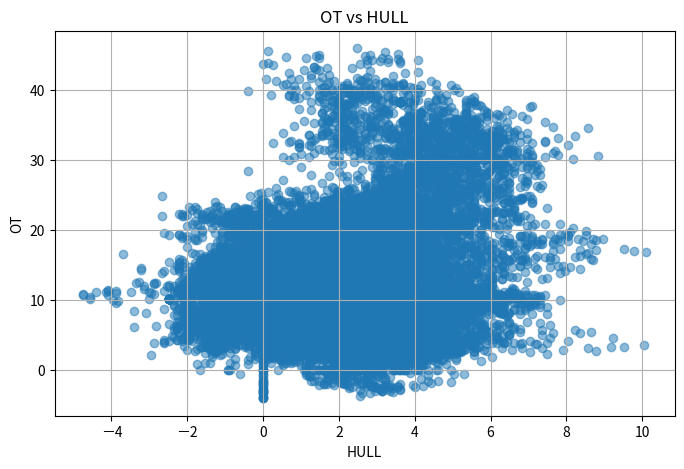

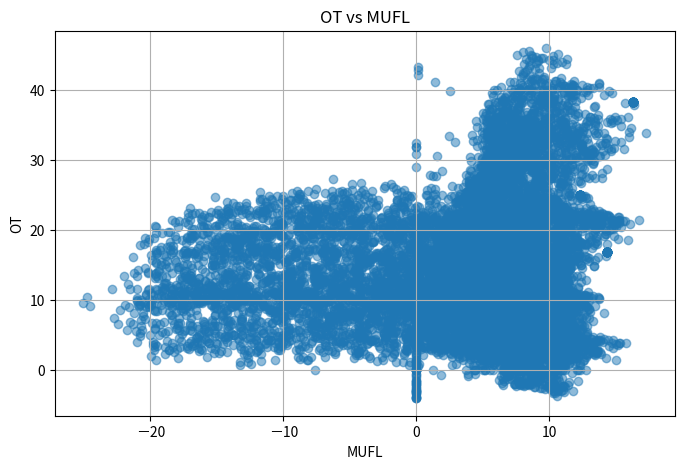

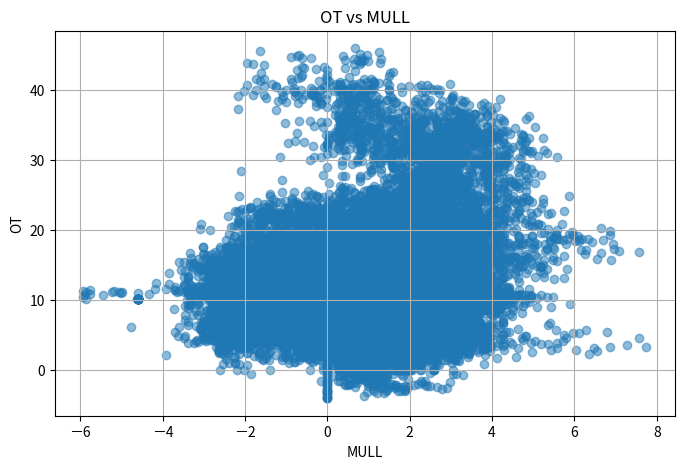

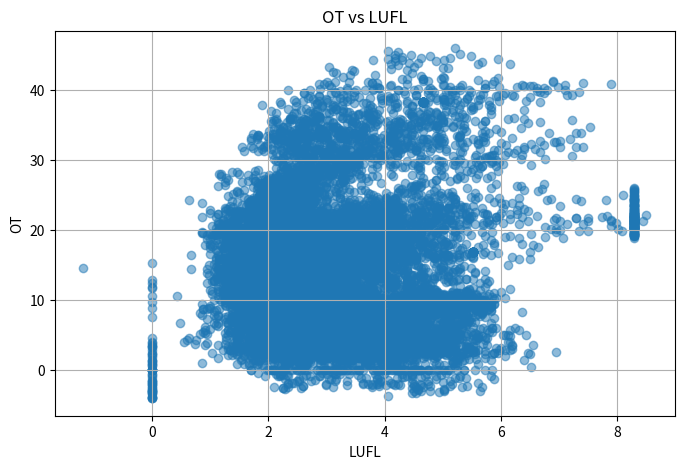

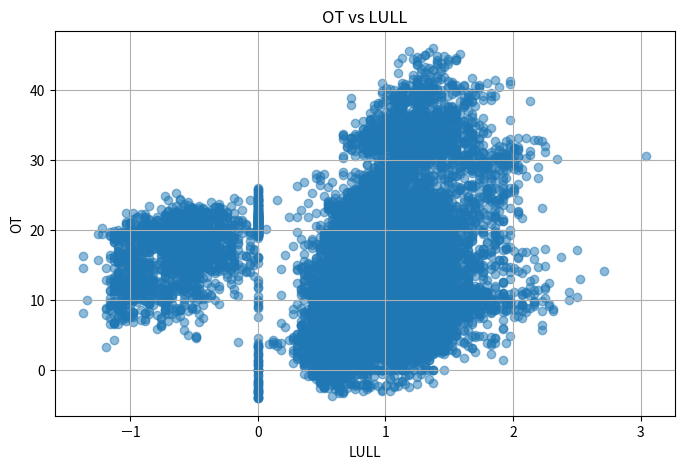

In [32]:

# Scatter plots to visualize relationships between OT and other variables
columns_to_plot = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']

for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[column], df['OT'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('OT')
    plt.title(f'OT vs {column}')
    plt.grid()
    plt.show()


In [21]:

# Add a column for the numerical representation of the date
df['date_ordinal'] = df.index.map(pd.Timestamp.toordinal)

# Calculate correlation including the new 'date_ordinal' column
correlation_matrix_with_date = df.corr()
print(correlation_matrix_with_date['OT'])


HUFL            0.059916
HULL            0.224354
MUFL            0.050854
MULL            0.220004
LUFL            0.118836
LULL            0.067455
OT              1.000000
date_ordinal   -0.623655
Name: OT, dtype: float64


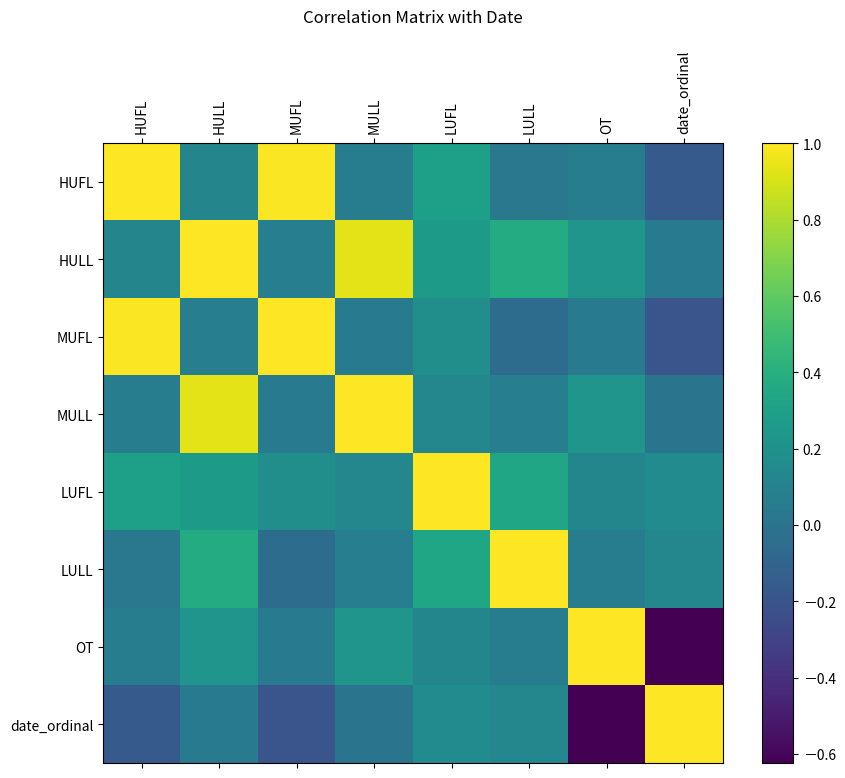

In [22]:

# Plot correlation matrix including 'date_ordinal'
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix_with_date, fignum=1)
plt.xticks(range(len(correlation_matrix_with_date.columns)), correlation_matrix_with_date.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_with_date.columns)), correlation_matrix_with_date.columns)
plt.colorbar()
plt.title("Correlation Matrix with Date", pad=20)
plt.show()


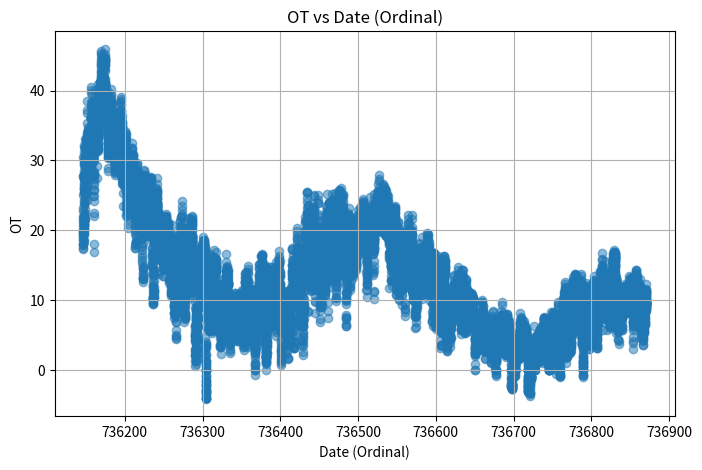

In [23]:

# Scatter plot to visualize relationship between OT and date_ordinal
plt.figure(figsize=(8, 5))
plt.scatter(df['date_ordinal'], df['OT'], alpha=0.5)
plt.xlabel('Date (Ordinal)')
plt.ylabel('OT')
plt.title('OT vs Date (Ordinal)')
plt.grid()
plt.show()
